In [188]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [189]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cpu


In [190]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x



In [191]:
torch.manual_seed(47)
model = Model()

In [192]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [193]:
url = 'https://gist.githubusercontent.com/Thanatoz-1/9e7fdfb8189f0cdf5d73a494e4a6392a/raw/aaecbd14aeaa468cd749528f291aa8a30c2ea09e/iris_dataset.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [194]:
my_df['target'] = my_df['target'].replace('Iris-setosa', 0.0)
my_df['target'] = my_df['target'].replace('Iris-versicolor', 1.0)
my_df['target'] = my_df['target'].replace('Iris-virginica',2.0)
my_df

/var/folders/bh/7hjbzj9j69x6kcz_hqrn6mrh0000gr/T/ipykernel_56982/4124916311.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['target'] = my_df['target'].replace('Iris-virginica',2.0)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [195]:
X = my_df.drop('target', axis=1)
y = my_df['target']

In [196]:
X = X.values
y = y.values
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)


In [198]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [199]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([120, 4])
torch.Size([30, 4])
torch.Size([120])
torch.Size([30])


In [200]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [201]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if i % 10 == 0:
        print(f'Epoch: {i}, loss: {loss}')

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    

Epoch: 0, loss: 1.1396862268447876
Epoch: 10, loss: 1.0785291194915771
Epoch: 20, loss: 0.9810280203819275
Epoch: 30, loss: 0.7993490099906921
Epoch: 40, loss: 0.6076685190200806
Epoch: 50, loss: 0.473385214805603
Epoch: 60, loss: 0.3756624758243561
Epoch: 70, loss: 0.2783973813056946
Epoch: 80, loss: 0.18964837491512299
Epoch: 90, loss: 0.13183507323265076


Text(0.5, 0, 'epoch')

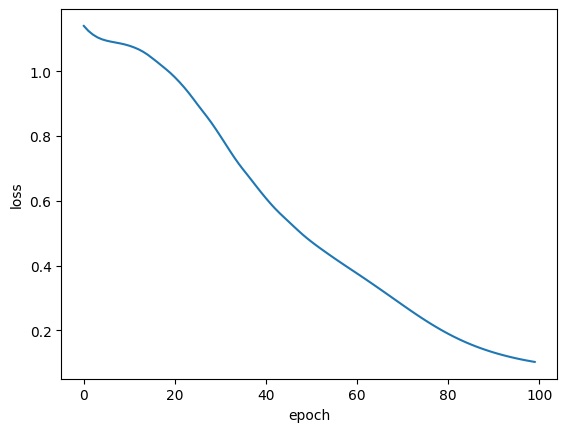

In [202]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch')

In [203]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
loss

tensor(0.0648)

In [204]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print(f'{i+1} -> {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item() == y_test[i]}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'Num correct {correct}')

1 -> tensor([ 3.2072, -0.6577, -5.5668]) 	 0 	 True
2 -> tensor([ 3.2202, -0.7197, -5.5299]) 	 0 	 True
3 -> tensor([-1.7340,  3.8507,  0.6723]) 	 1 	 True
4 -> tensor([ 3.0888, -0.3439, -5.5602]) 	 0 	 True
5 -> tensor([ 3.2144, -0.6919, -5.5464]) 	 0 	 True
6 -> tensor([-7.4519,  5.7577, 10.4092]) 	 2 	 True
7 -> tensor([-1.5176,  3.7697,  0.3090]) 	 1 	 True
8 -> tensor([-6.5174,  5.0254,  9.0611]) 	 2 	 True
9 -> tensor([-2.0417,  3.8447,  1.2577]) 	 1 	 True
10 -> tensor([ 3.2069, -0.6562, -5.5676]) 	 0 	 True
11 -> tensor([-5.2486,  4.8710,  6.7432]) 	 2 	 True
12 -> tensor([ 3.1815, -0.5431, -5.6290]) 	 0 	 True
13 -> tensor([-1.5927,  3.7725,  0.4494]) 	 1 	 True
14 -> tensor([-5.5715,  5.6269,  6.9265]) 	 2 	 True
15 -> tensor([-4.2921,  4.3887,  5.2068]) 	 2 	 True
16 -> tensor([-6.3748,  5.1936,  8.6909]) 	 2 	 True
17 -> tensor([-0.7048,  3.7169, -1.1988]) 	 1 	 True
18 -> tensor([ 3.2078, -0.6605, -5.5651]) 	 0 	 True
19 -> tensor([ 3.1175, -0.4055, -5.5814]) 	 0 	 True
20